In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [29]:
df = pd.read_csv('/content/drive/MyDrive/mlb11.csv',index_col=0)
df.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
1,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
2,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
3,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
4,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
5,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


In [19]:
df.describe()

,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000
mean,693.600000,5523.500000,1408.900000,151.733333,0.254933,1149.600000,109.300000,80.966667,0.320467,0.398833,0.71910
std,82.479088,79.873067,87.081947,35.587612,0.012744,108.049988,29.868851,11.415305,0.013441,0.029131,0.04155
min,556.000000,5417.000000,1263.000000,91.000000,0.233000,930.000000,49.000000,56.000000,0.292000,0.348000,0.64000
25%,629.000000,5448.250000,1348.000000,118.000000,0.244750,1085.250000,89.750000,72.000000,0.311000,0.377000,0.69200
50%,705.500000,5515.500000,1394.500000,154.000000,0.253000,1140.500000,107.000000,80.000000,0.318500,0.398500,0.71600
75%,734.000000,5575.000000,1441.000000,172.750000,0.260250,1247.750000,130.750000,90.000000,0.328250,0.413000,0.73825
max,875.000000,5710.000000,1600.000000,222.000000,0.283000,1323.000000,170.000000,102.000000,0.349000,0.461000,0.81000


# Correlation

### Plot correlation matrix

In [30]:
df.corr(method="pearson").style.background_gradient()

,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
runs,1.000000,0.610627,0.801211,0.791558,0.809986,-0.411531,0.053981,0.600809,0.921469,0.947032,0.966916
at_bats,0.610627,1.000000,0.846472,0.376515,0.755374,-0.463424,-0.107529,0.062156,0.598145,0.620277,0.627909
hits,0.801211,0.846472,1.000000,0.470838,0.987958,-0.617228,-0.126330,0.297659,0.854846,0.818238,0.850833
homeruns,0.791558,0.376515,0.470838,1.000000,0.471511,-0.170755,-0.117324,0.660614,0.616327,0.862832,0.810667
bat_avg,0.809986,0.755374,0.987958,0.471511,1.000000,-0.634814,-0.123147,0.350793,0.882302,0.828490,0.867099
strikeouts,-0.411531,-0.463424,-0.617228,-0.170755,-0.634814,1.000000,0.087642,-0.280727,-0.486880,-0.409822,-0.443975
stolen_bases,0.053981,-0.107529,-0.126330,-0.117324,-0.123147,0.087642,1.000000,-0.064594,-0.033256,-0.074128,-0.061846
wins,0.600809,0.062156,0.297659,0.660614,0.350793,-0.280727,-0.064594,1.000000,0.552278,0.614166,0.612075
new_onbase,0.921469,0.598145,0.854846,0.616327,0.882302,-0.486880,-0.033256,0.552278,1.000000,0.871865,0.937283
new_slug,0.947032,0.620277,0.818238,0.862832,0.828490,-0.409822,-0.074128,0.614166,0.871865,1.000000,0.987764


### Drop variables with low correlation to *runs*

In [32]:
df = df.drop(['team','at_bats','strikeouts','stolen_bases','wins'],axis=1)
df.head()

,runs,hits,homeruns,bat_avg,new_onbase,new_slug,new_obs
1,855,1599,210,0.283,0.340,0.460,0.800
2,875,1600,203,0.280,0.349,0.461,0.810
3,787,1540,169,0.277,0.340,0.434,0.773
4,730,1560,129,0.275,0.329,0.415,0.744
5,762,1513,162,0.273,0.341,0.425,0.766


# EDA

In [50]:
def plot(df,transform="None"):
  df_transform = df.copy()

  for col in df_transform.columns:
    if transform == 'log':
      df_transform[col] = list(map(np.log,df_transform[col]))
    elif transform == 'square':
      df_transform[col] = list(map(np.square,df_transform[col]))
    elif transform == 'root':
      df_transform[col] = list(map(np.sqrt,df_transform[col]))
    else: 
      pass

  count = 1
  plt.figure(figsize=(16,8))
  for col in df_transform.columns:
    if col == 'runs':
      pass
    else: 
      plt.subplot(2,3,count)
      plt.hist(df_transform[col])
      plt.title(col)
      count = count + 1

  plt.figure()
  plt.hist(df_transform['runs'])
  plt.title('runs')

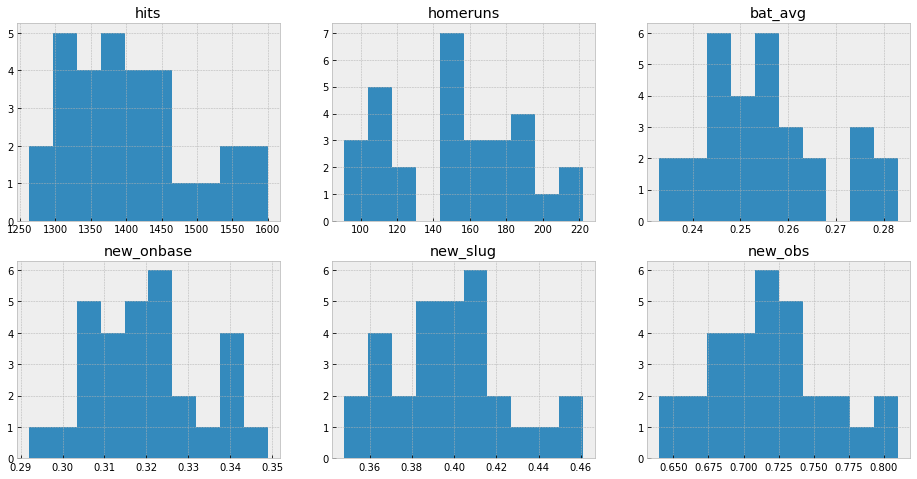

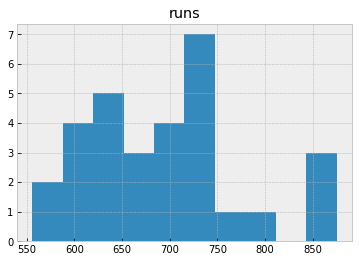

In [51]:
plot(df)

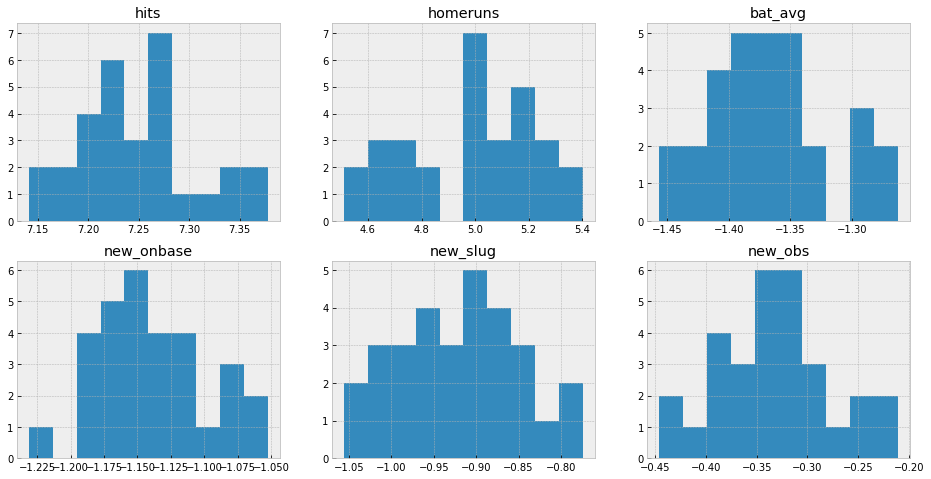

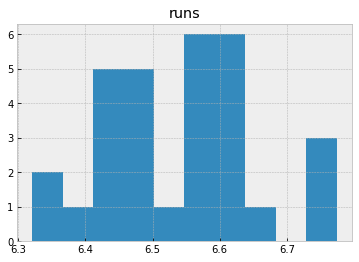

In [52]:
plot(df,"log")

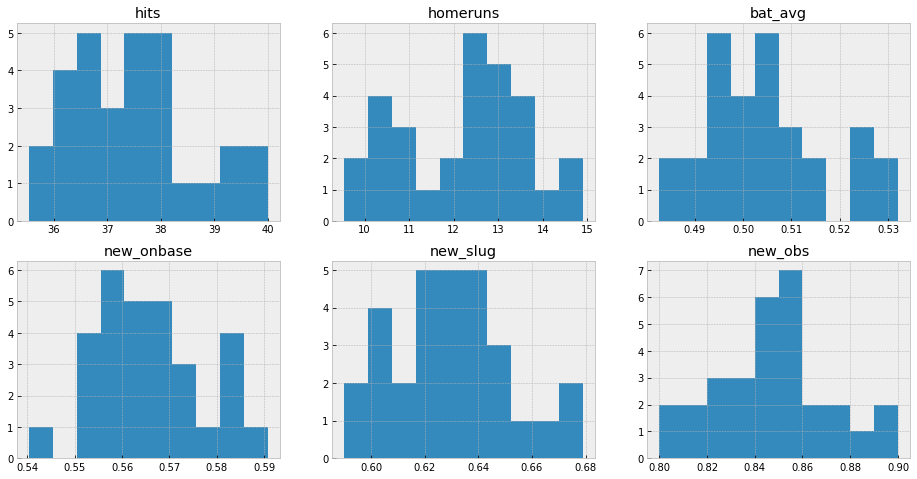

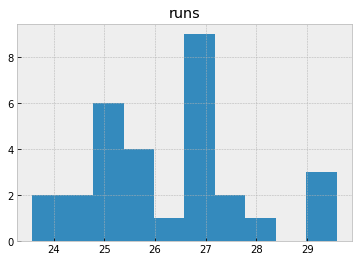

In [54]:
plot(df,"root")

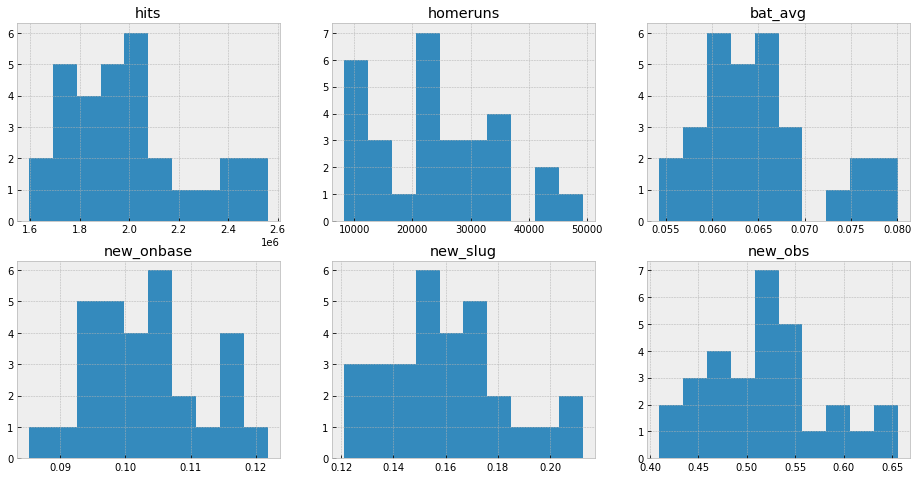

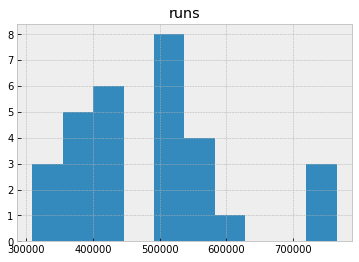

In [53]:
plot(df,"square")